In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv("Churn_Modelling.csv")

In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


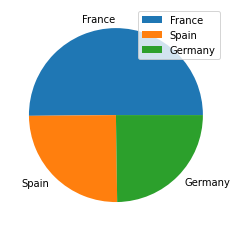

In [3]:
#Perform Below Visualizations
#Univariate Analysis
y=df['Geography'].value_counts()

mylabels=df['Geography'].unique()
plt.pie(y,labels = mylabels)
plt.legend()
plt.show()

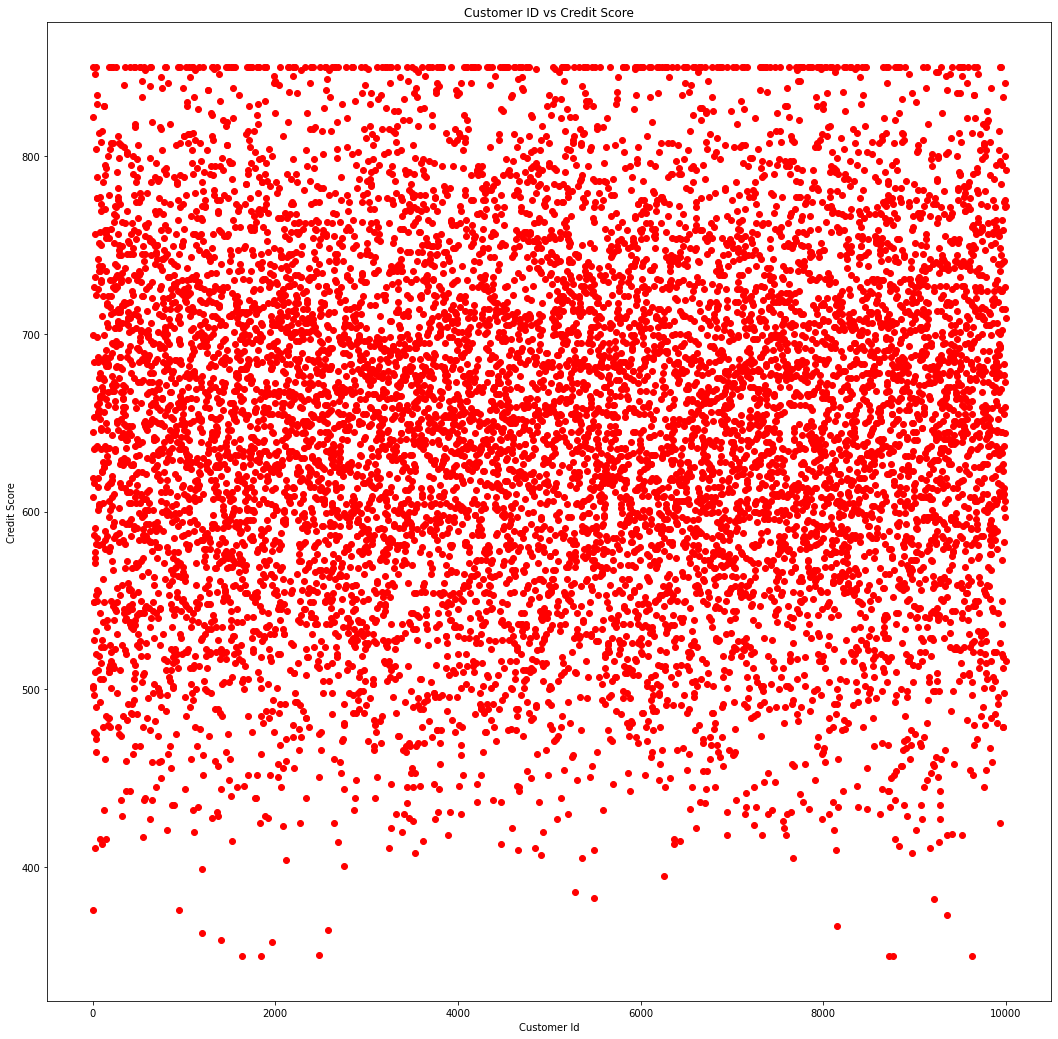

In [30]:
#Bi - Variate Analysis
x=df['RowNumber']
y=df['CreditScore']
plt.figure(figsize=(18, 18))
plt.title("Customer ID vs Credit Score")
plt.xlabel("Customer Id") 
plt.ylabel("Credit Score")
plt.scatter(x,y,c='red')

In [ ]:
#Multi - Variate Analysis
sns.pairplot(df);

In [4]:
#Perform descriptive statistics on the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Handle the Missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
print("Number of Missing value is:",df.isnull().sum().sum())

Number of Missing value is: 0


There is no Null

In [7]:
#Find the outliers and replace the outliers
#Checking for outliers
def box_scatter(data, a, b):    
    fig, (a1, a2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=a, ax=a1)
    sns.scatterplot(data=data, x=a,y=b,ax=a2)

# of Bivariate Outliers: 19


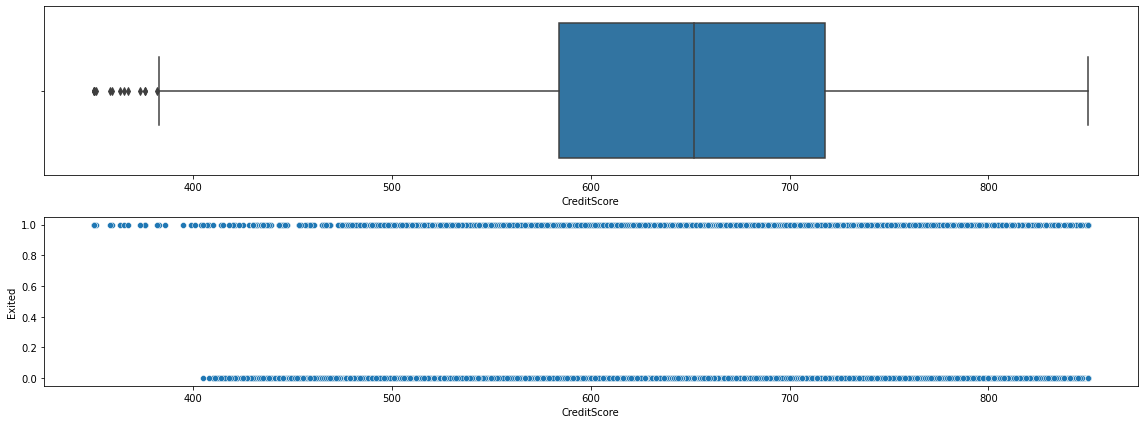

In [8]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


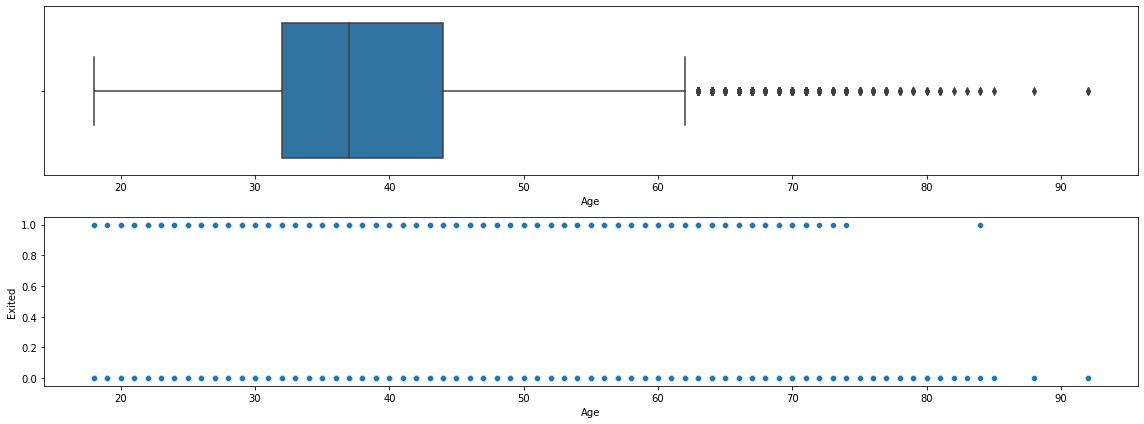

In [9]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


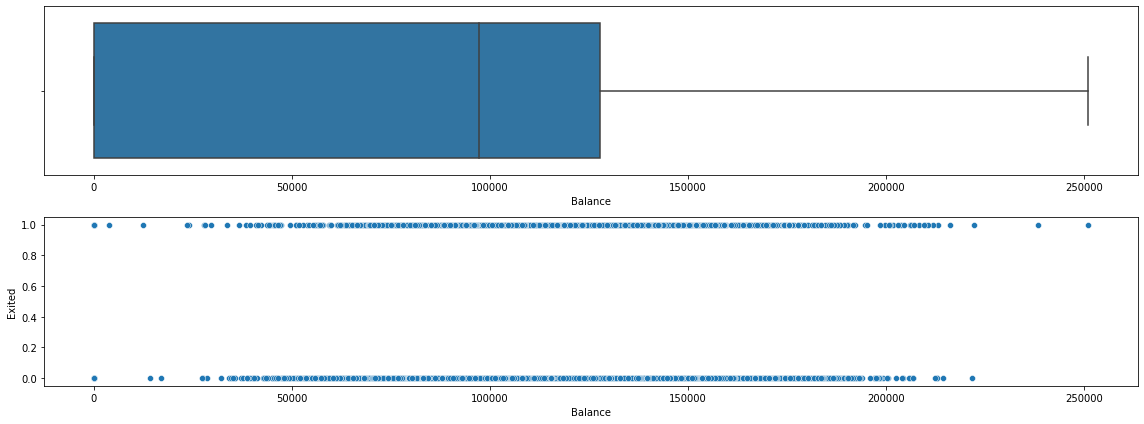

In [10]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

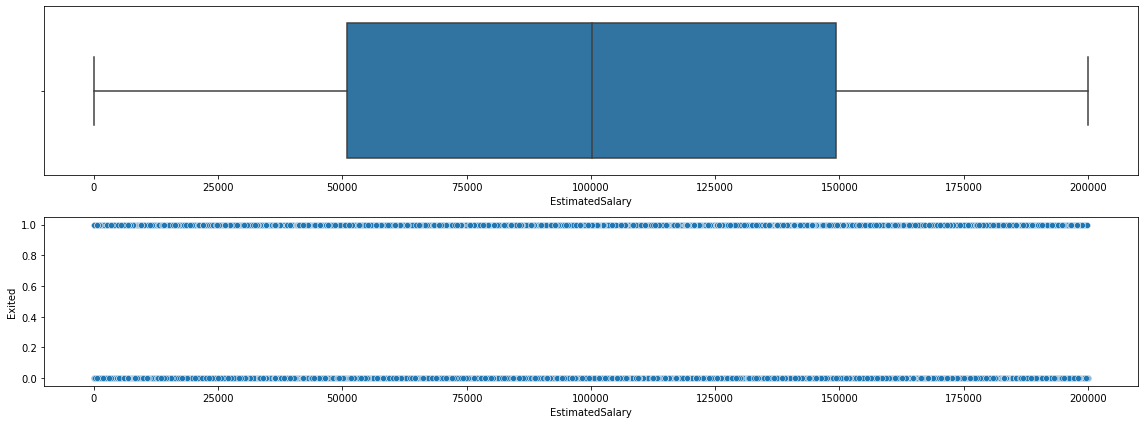

In [11]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

In [12]:
#Removing outliers
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])
        

# of Bivariate Outliers: 19


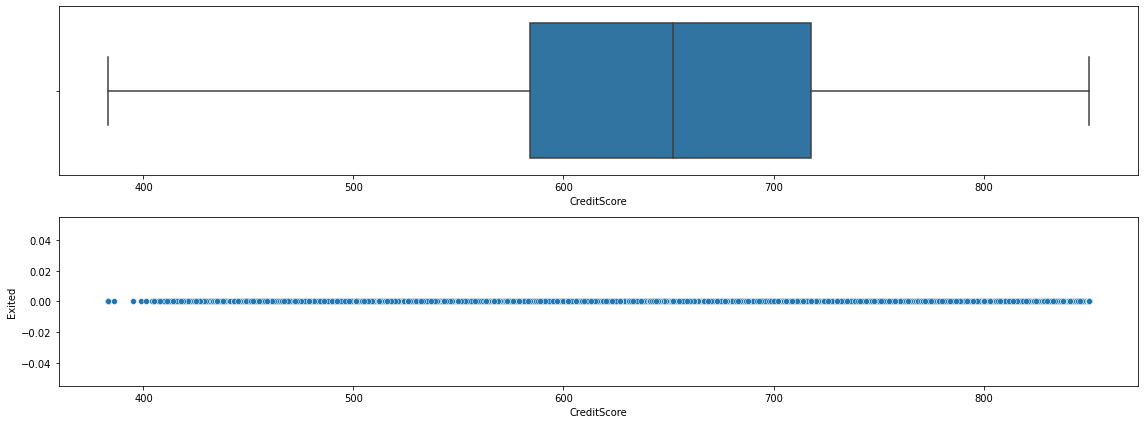

In [13]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


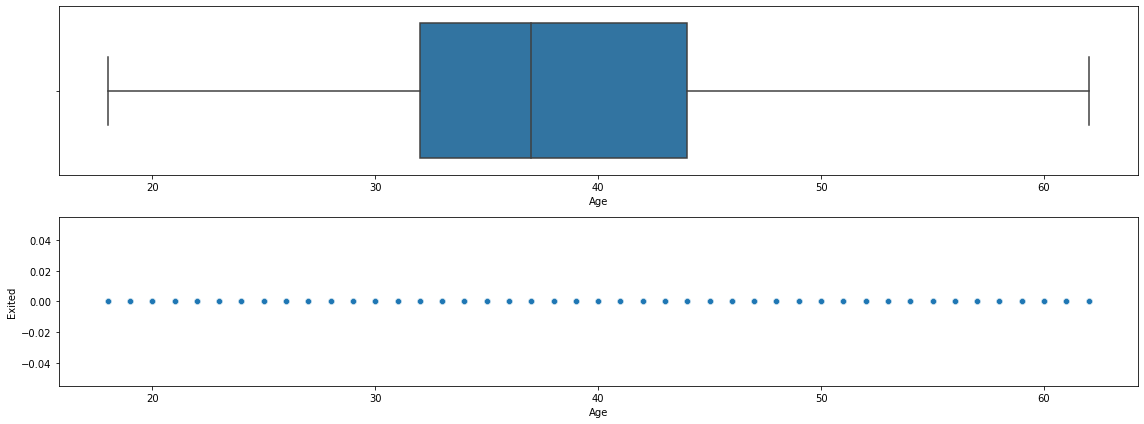

In [42]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


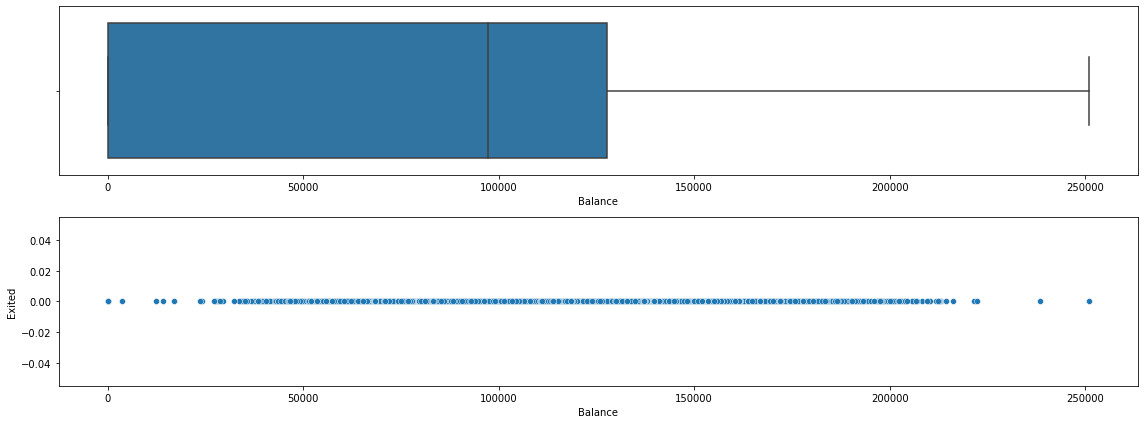

In [14]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

In [15]:
#Check for Categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

In [16]:
#Split the data into dependent and independent variables.
#Dependent Variable
x= df.iloc[:, -2].values
#Independent Variable
y= df.iloc[:, :-2].values

In [17]:
#Scale the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Tenure"]] = scaler.fit_transform(df[["Tenure"]])

In [18]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [20]:
x_train

array([177772.03, 128052.29,  84033.35, ..., 181429.87, 148750.16,
       118855.26])

In [21]:
x_test

array([192852.67, 128702.1 ,  75732.25, ..., 137041.26,  32996.89,
       125305.34])

In [22]:
y_train

array([[3.3400000e+02, 1.5728669e+07, 1.4260000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [6.3920000e+03, 1.5784099e+07, 5.6300000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [4.7870000e+03, 1.5749799e+07, 2.1780000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [3.2650000e+03, 1.5574372e+07, 1.2020000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.8460000e+03, 1.5664035e+07, 2.1220000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.7330000e+03, 1.5592816e+07, 2.6780000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [23]:
y_test

array([[9.3950000e+03, 1.5615753e+07, 2.6910000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [8.9900000e+02, 1.5654700e+07, 8.4600000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.3990000e+03, 1.5633877e+07, 1.8570000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [4.5780000e+03, 1.5703979e+07, 8.3300000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [8.6010000e+03, 1.5755405e+07, 1.2400000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [8.4800000e+02, 1.5586959e+07, 2.6890000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])